**Nama: Muhammad Al Fikri**

**Asal Instansi: STT Terpadu Nurul Fikri**

**Grup SIB: M04**

*Dataset yang digunakan:*  
https://www.kaggle.com/datasets/chetankv/dogs-cats-images

# Proses Klasifikasi Gambar Anjing dan Kucing

## Mengimpor Library yang Dibutuhkan

In [1]:
from google.colab import drive
import zipfile, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

## Mengimpor Dataset dari Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Melakukan Ekstraksi pada File zip

In [3]:
local_zip = '/content/drive/MyDrive/dataset/dogvscat.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Melakukan Splitting Data

In [4]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

## Menampilkan Kelas dari train_dir dan validation_dir

In [5]:
os.listdir(train_dir)

['cats', 'dogs']

In [6]:
os.listdir(validation_dir)

['cats', 'dogs']

## Preprocessing Data

In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 40,
                    horizontal_flip = True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    validation_split=0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 32, 
        class_mode = 'binary'
        )

Found 2000 images belonging to 2 classes.


## Membuat Model

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Menampilkan Model Summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Menambahkan Optimizer

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Menambahkan Fitur Callback

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy')>0.9):
      print("Akurasi minimum sudah tercapai (90%)")
      self.model.stop_training = True

callbacks = myCallback()

## Melakukan Proses Training Model

In [13]:
num_epochs = 50
history = model.fit(
      train_generator,
      epochs=num_epochs,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/50
250/250 - 71s - loss: 0.6770 - accuracy: 0.5630 - val_loss: 0.7052 - val_accuracy: 0.6000 - 71s/epoch - 283ms/step
Epoch 2/50
250/250 - 57s - loss: 0.6212 - accuracy: 0.6551 - val_loss: 0.6255 - val_accuracy: 0.6562 - 57s/epoch - 228ms/step
Epoch 3/50
250/250 - 55s - loss: 0.5930 - accuracy: 0.6842 - val_loss: 0.5589 - val_accuracy: 0.7312 - 55s/epoch - 221ms/step
Epoch 4/50
250/250 - 57s - loss: 0.5659 - accuracy: 0.7060 - val_loss: 0.5635 - val_accuracy: 0.7000 - 57s/epoch - 229ms/step
Epoch 5/50
250/250 - 56s - loss: 0.5370 - accuracy: 0.7325 - val_loss: 0.4391 - val_accuracy: 0.8000 - 56s/epoch - 223ms/step
Epoch 6/50
250/250 - 57s - loss: 0.5177 - accuracy: 0.7441 - val_loss: 0.4699 - val_accuracy: 0.7625 - 57s/epoch - 228ms/step
Epoch 7/50
250/250 - 55s - loss: 0.4922 - accuracy: 0.7621 - val_loss: 0.4543 - val_accuracy: 0.7750 - 55s/epoch - 222ms/step
Epoch 8/50
250/250 - 57s - loss: 0.4785 - accuracy: 0.7709 - val_loss: 0.3642 - val_accuracy: 0.8562 - 57s/epoch - 228

## Menampilkan Plot Accuracy

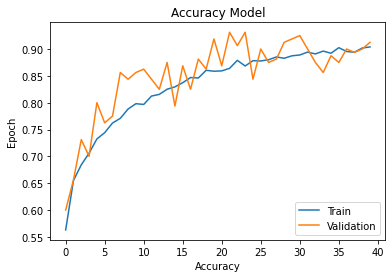

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Accuracy")
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'],loc='lower right')
plt.show()

## Menampilkan Plot Loss

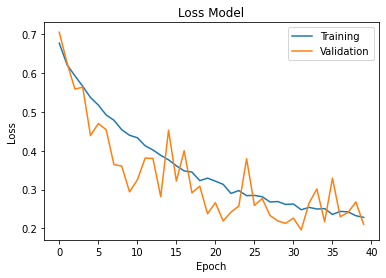

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation' ],loc='upper right')
plt.show()

## Melakukan Prediksi Gambar

Saving cat.1.jpg to cat.1 (1).jpg
cat.1.jpg
Cat


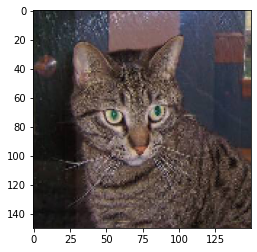

In [22]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('Dog')
  else:
    print('Cat')


Saving dog.21.jpg to dog.21.jpg
dog.21.jpg
Dog


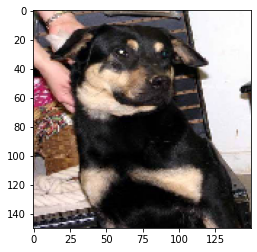

In [35]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('Dog')
  else:
    print('Cat')

## Mengubah Model

In [36]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [38]:
import pathlib
tflite_model_file = pathlib.Path('catvsdog.tflite')
tflite_model_file.write_bytes(tflite_model)

1074044